In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import copy
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
# !wget -p /content/first_data/ https://bi.s3.es.gov.br/covid19/MICRODADOS_BAIRROS.csv

In [ ]:
# !wget -p /content/ https://bi.s3.es.gov.br/covid19/MICRODADOS.csv


In [ ]:
# !wget -p /content/ https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD20-01-05-2023.csv

In [ ]:
# !wget -p /content/ https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-01-05-2023.csv

In [ ]:
# !wget -p /content/ https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2022/INFLUD22-03-04-2023.csv

In [ ]:
# !wget -p /content/ https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2023/INFLUD23-19-06-2023.csv

In [ ]:
# rm -r /content/drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp -r /content/bi.s3.es.gov.br /content/drive/MyDrive
# !cp -r /content/s3.sa-east-1.amazonaws.com /content/drive/MyDrive

In [ ]:
col_2020 = []
col_2021 = []
col_2022 = []
col_2023 = []

In [ ]:
import pandas as pd

d1_bairros_path = '/content/drive/MyDrive/Covid files/bi.s3.es.gov.br/covid19/MICRODADOS_BAIRROS.csv'
d1_path = '/content/drive/MyDrive/Covid files/bi.s3.es.gov.br/covid19/MICRODADOS.csv'
d2_2020_path = '/content/drive/MyDrive/Covid files/s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD20-01-05-2023.csv'
d2_2021_path = '/content/drive/MyDrive/Covid files/s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-01-05-2023.csv'
d2_2022_path = '/content/drive/MyDrive/Covid files/s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2022/INFLUD22-03-04-2023.csv'
d2_2023_path = '/content/drive/MyDrive/Covid files/s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2023/INFLUD23-19-06-2023.csv'

df = pd.read_csv(d1_path, encoding='ISO-8859-1', delimiter=';')
# df00 = pd.read_csv(d2_2020_path, encoding='ISO-8859-1', delimiter=';')
# col_2020 = list(df00.columns)
# df01 = pd.read_csv(d2_2021_path, encoding='ISO-8859-1', delimiter=';')
# col_2021 = list(df01.columns)
# df02 = pd.read_csv(d2_2022_path, encoding='ISO-8859-1', delimiter=';')
# col_2022 = list(df02.columns)
# df03 = pd.read_csv(d2_2023_path, encoding='ISO-8859-1', delimiter=';')
# col_2023 = list(df03.columns)

# # split the single column into multiple columns
# split_df = df['Bairros,Municipios,Estado,Notificacoes,Casos,Obitos,Curados,Suspeitos,Descartados'].str.split(',', expand=True)
# split_df.drop(columns=[9], inplace=True)
# split_df.columns = df.columns[0].split(',')
# df = split_df

columns_en = ['NotificationDate', 'RegistrationDate', 'DiagnosisDate',
'PCRTestCollectionDate', 'RapidTestCollectionDate', 'SerologyTestCollectionDate',
'SerologyTestCollectionDate(IGG)', 'ClosureDate', 'DeathDate',
'Classification', 'Outcome', 'ConfirmationCriteria', 'NotificationStatus',
'City', 'Neighborhood', 'AgeRange', 'AgeAtNotificationDate', 'Gender',
'Race/Ethnicity', 'EducationLevel', 'Pregnant', 'Fever',
'RespiratoryDifficulty', 'Cough', 'RunnyNose', 'SoreThroat', 'Diarrhea',
'Headache', 'LungDiseaseComorbidity', 'CardiovascularDiseaseComorbidity',
'RenalDiseaseComorbidity', 'DiabetesComorbidity', 'SmokingComorbidity',
'ObesityComorbidity', 'Hospitalization', 'TravelledwithinBrazil',
'TravelledInternationally', 'HealthcareProfessional', 'HasDisability',
'Homeless', 'PCRTestResult', 'RapidTestResult',
'SerologyTestResult', 'SerologyTestResult(IGG)', 'RapidTestType']
df.columns = columns_en

df


In [ ]:
# Convert the datetime column to a pandas datetime format
df['NotificationDate'] = pd.to_datetime(df['NotificationDate'])
df = df.sort_values(by='NotificationDate',ascending=True)


In [ ]:
# df['NotificationDate'].to_csv('NotificationDate_column.csv')
# !cp -r '/content/NotificationDate_column.csv' '/content/drive/MyDrive/Covid files'

In [ ]:
df

<Axes: >

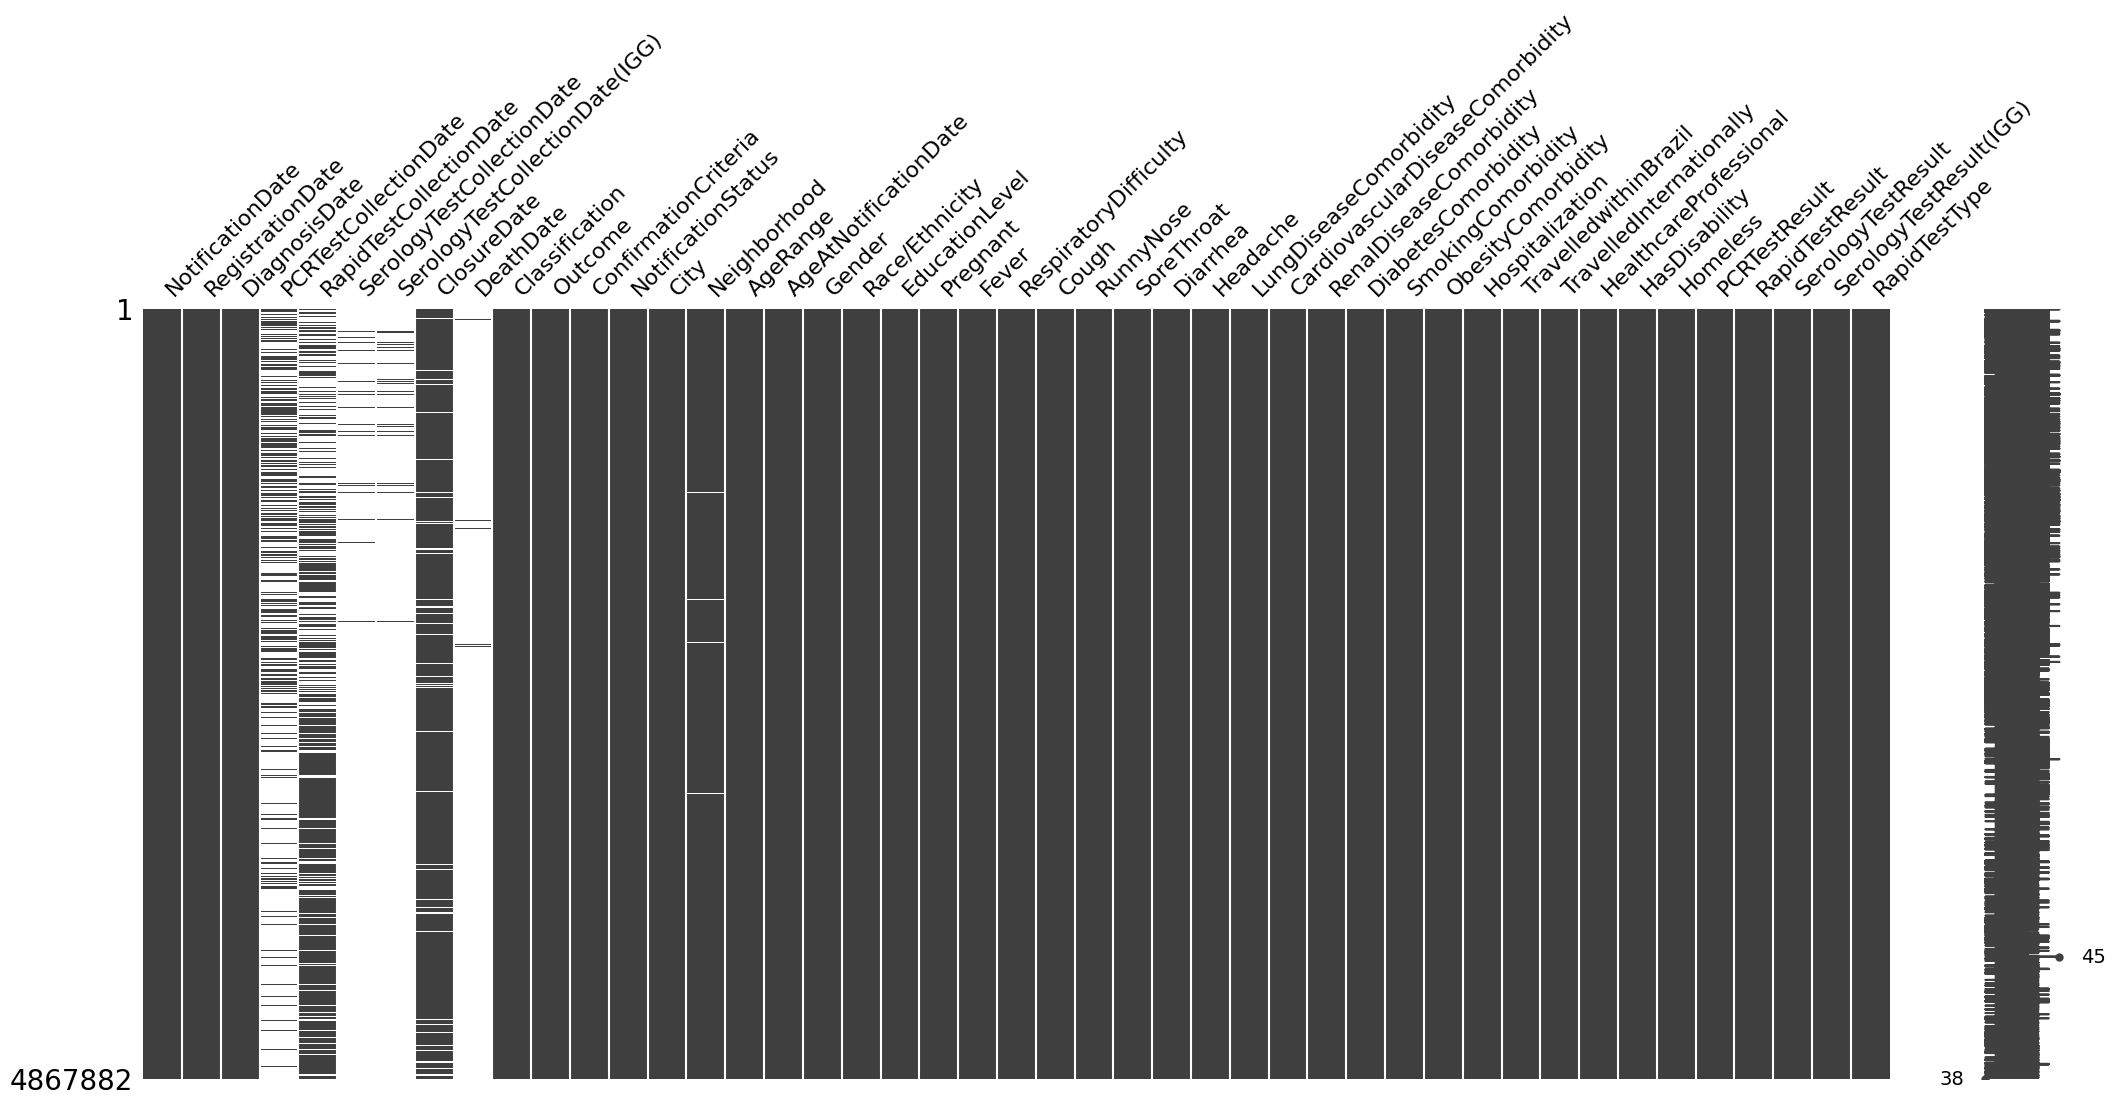

In [ ]:
x = msno.matrix(df)
x

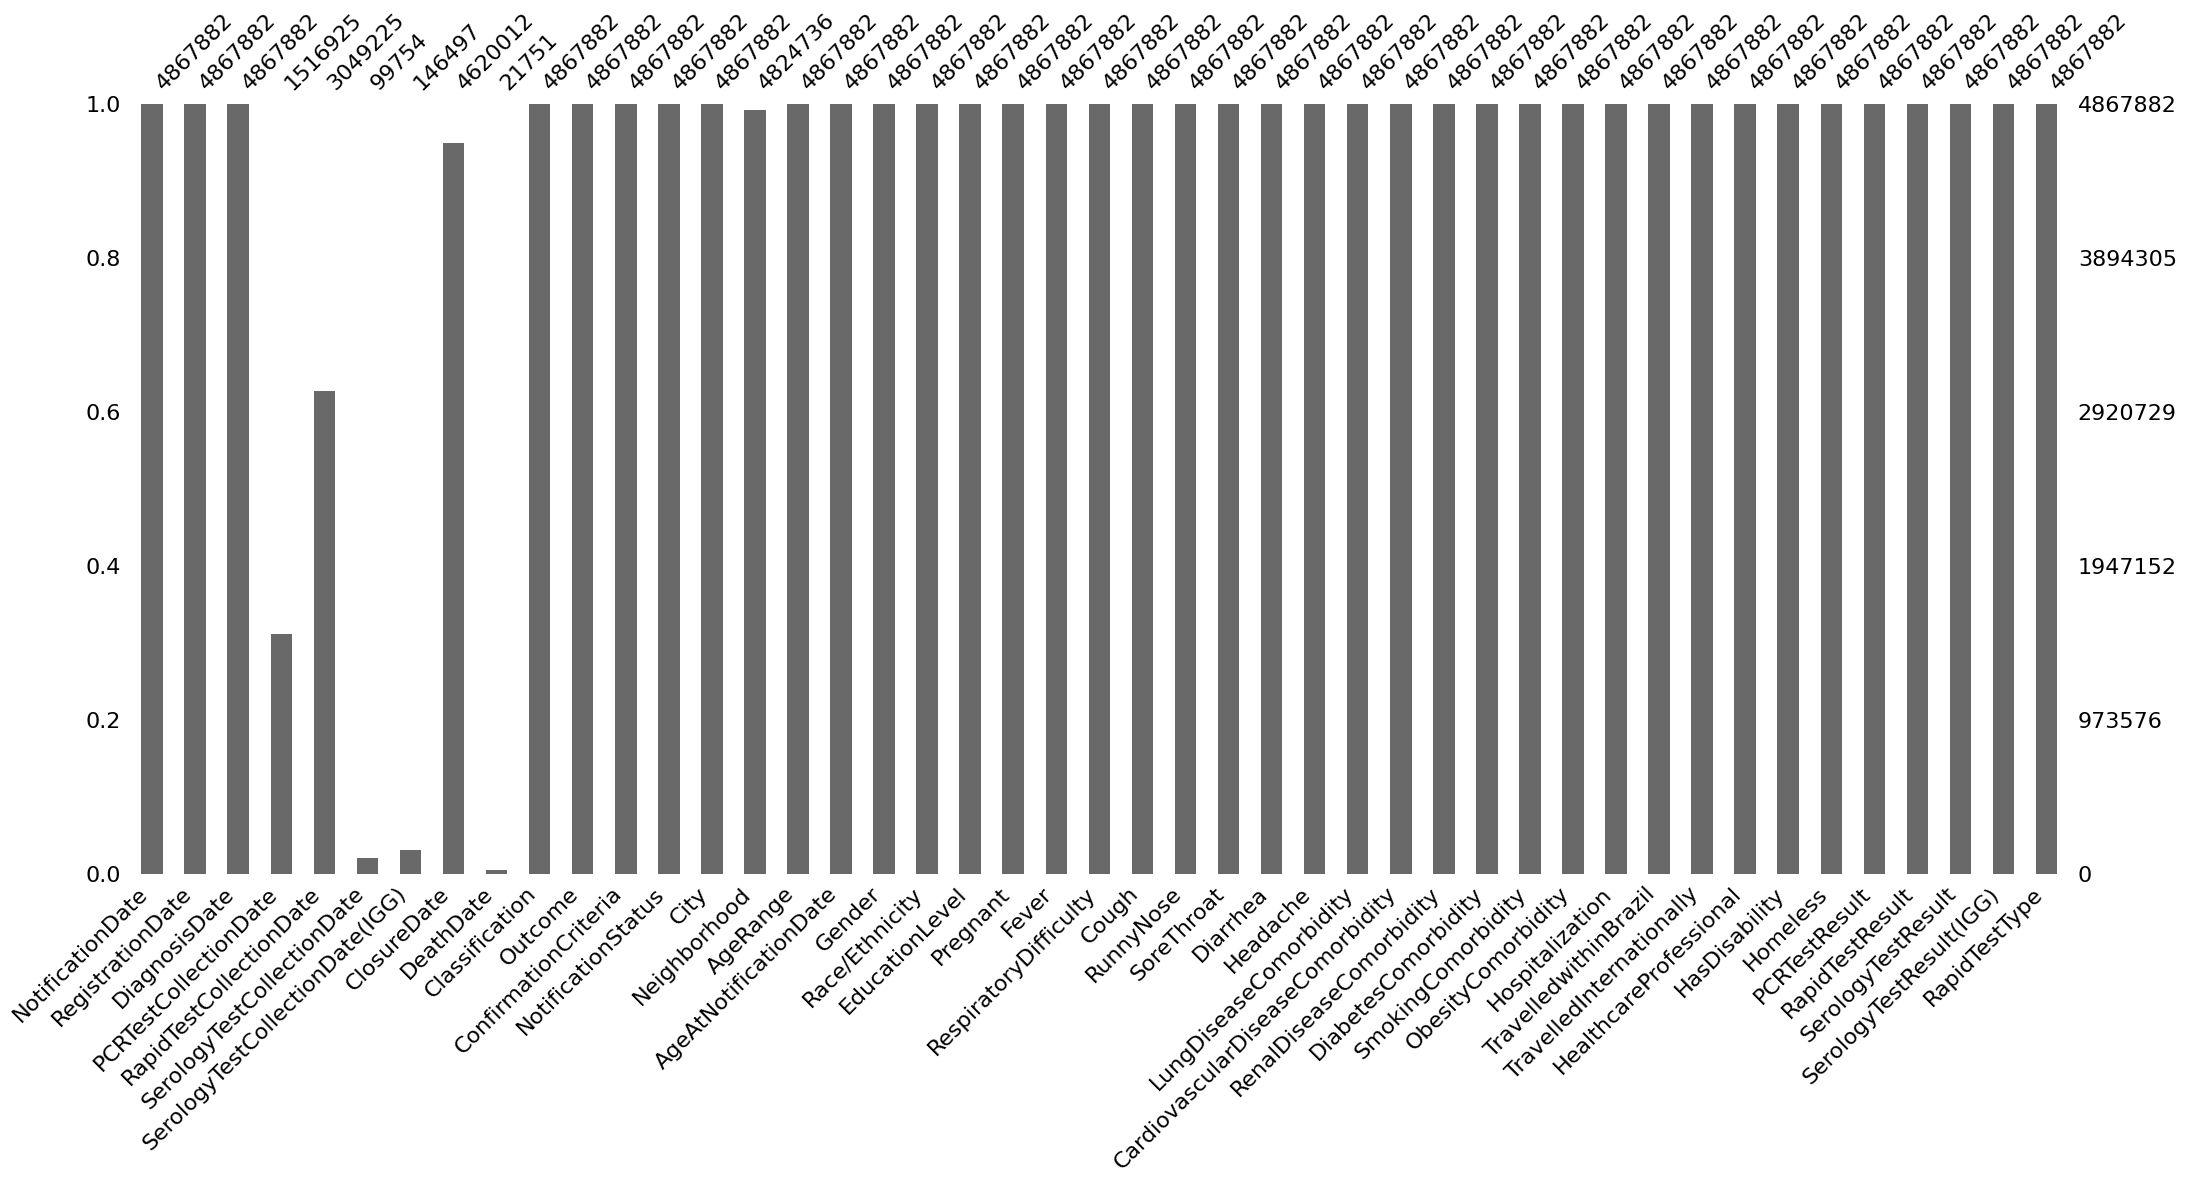

In [ ]:
# df = df.dropna(axis=1)

x = msno.bar(df)
x
fig.savefig('my_plot.jpg')

<Axes: >

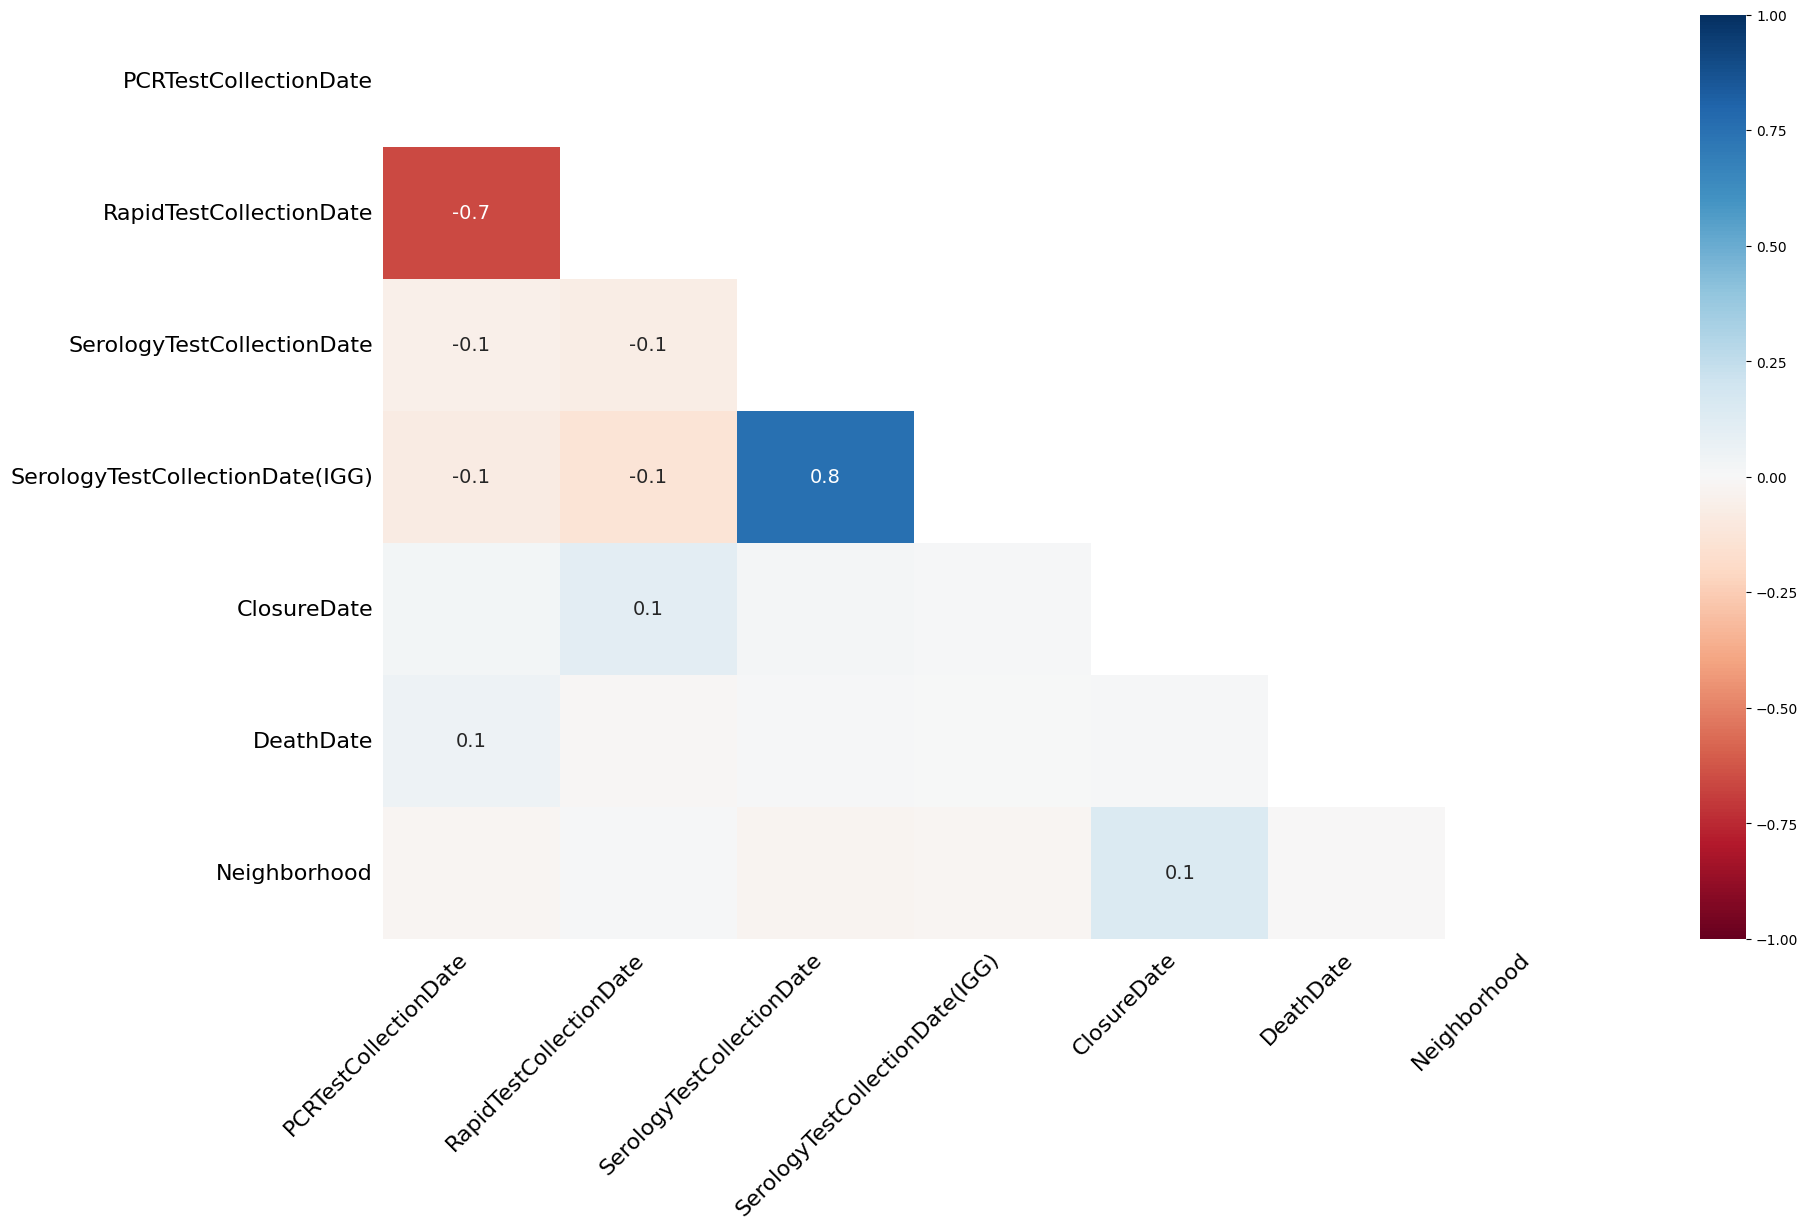

In [ ]:
x = msno.heatmap(df)
x

In [ ]:
df = df.replace('-', np.nan)
df = df.replace('Não Informado', np.nan)
df = df.replace('Ignorado', np.nan)

<Axes: >

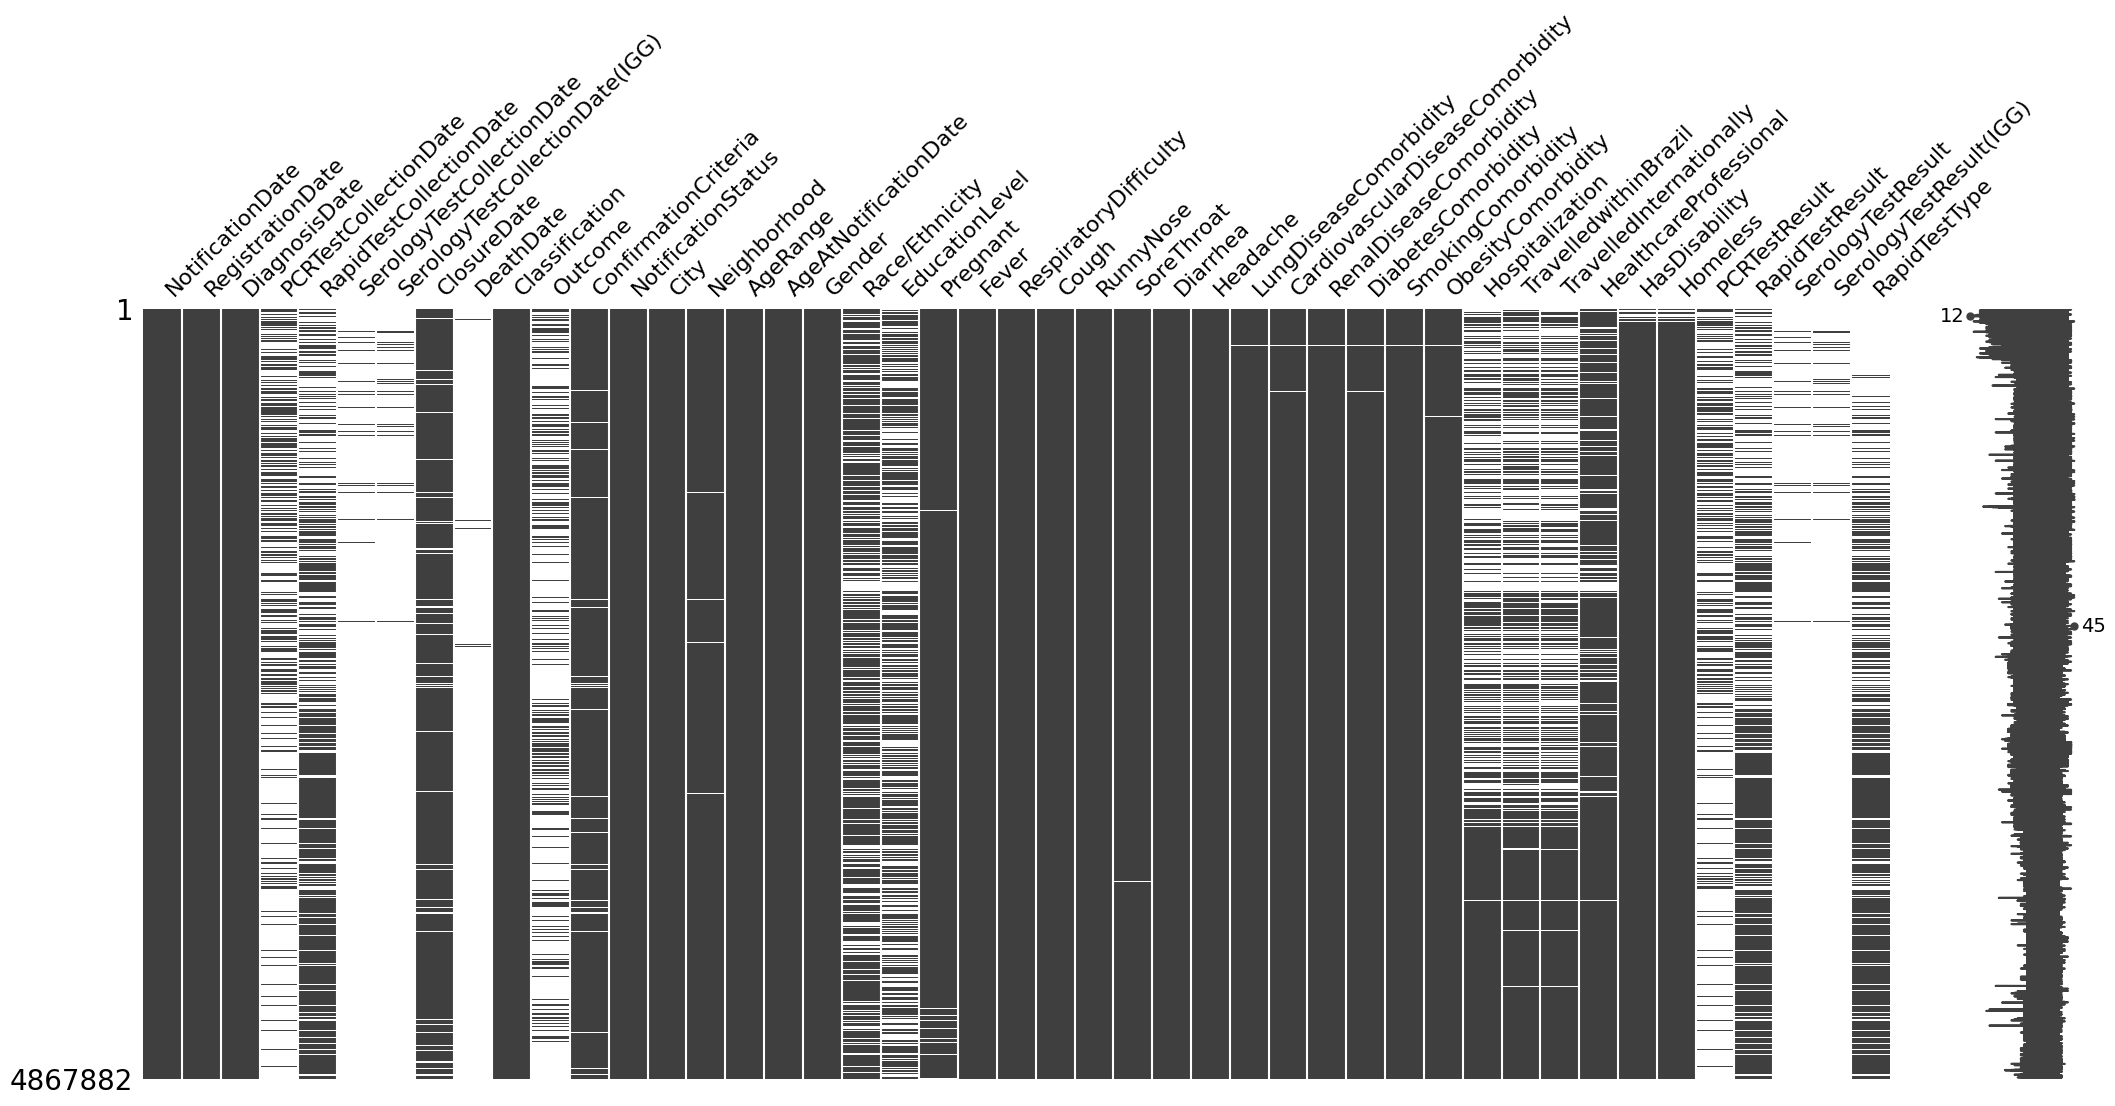

In [ ]:
x = msno.matrix(df)
x

<Axes: >

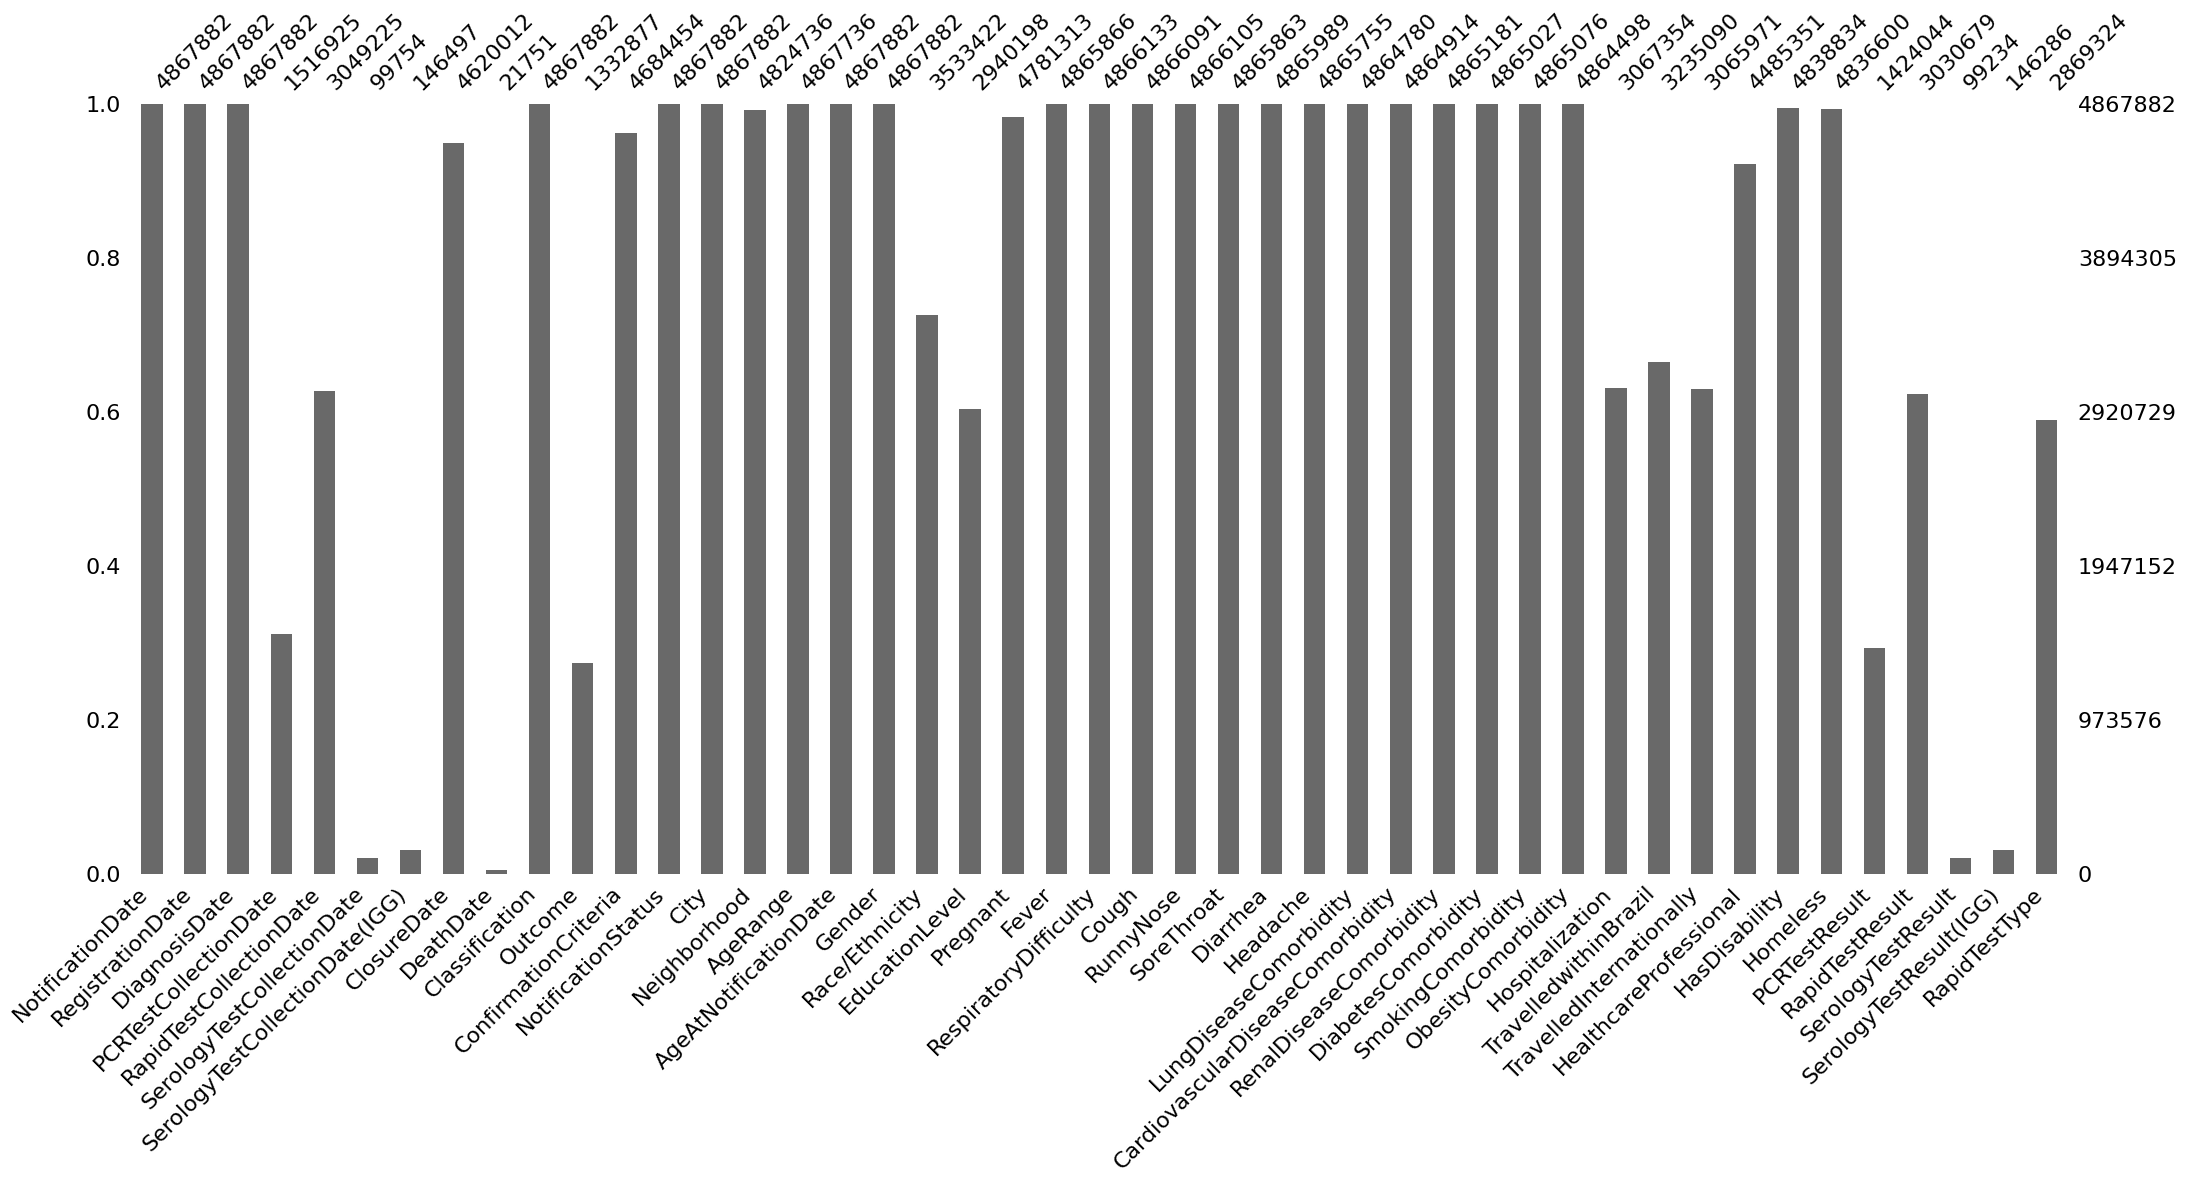

In [ ]:
x = msno.bar(df)
x

<Axes: >

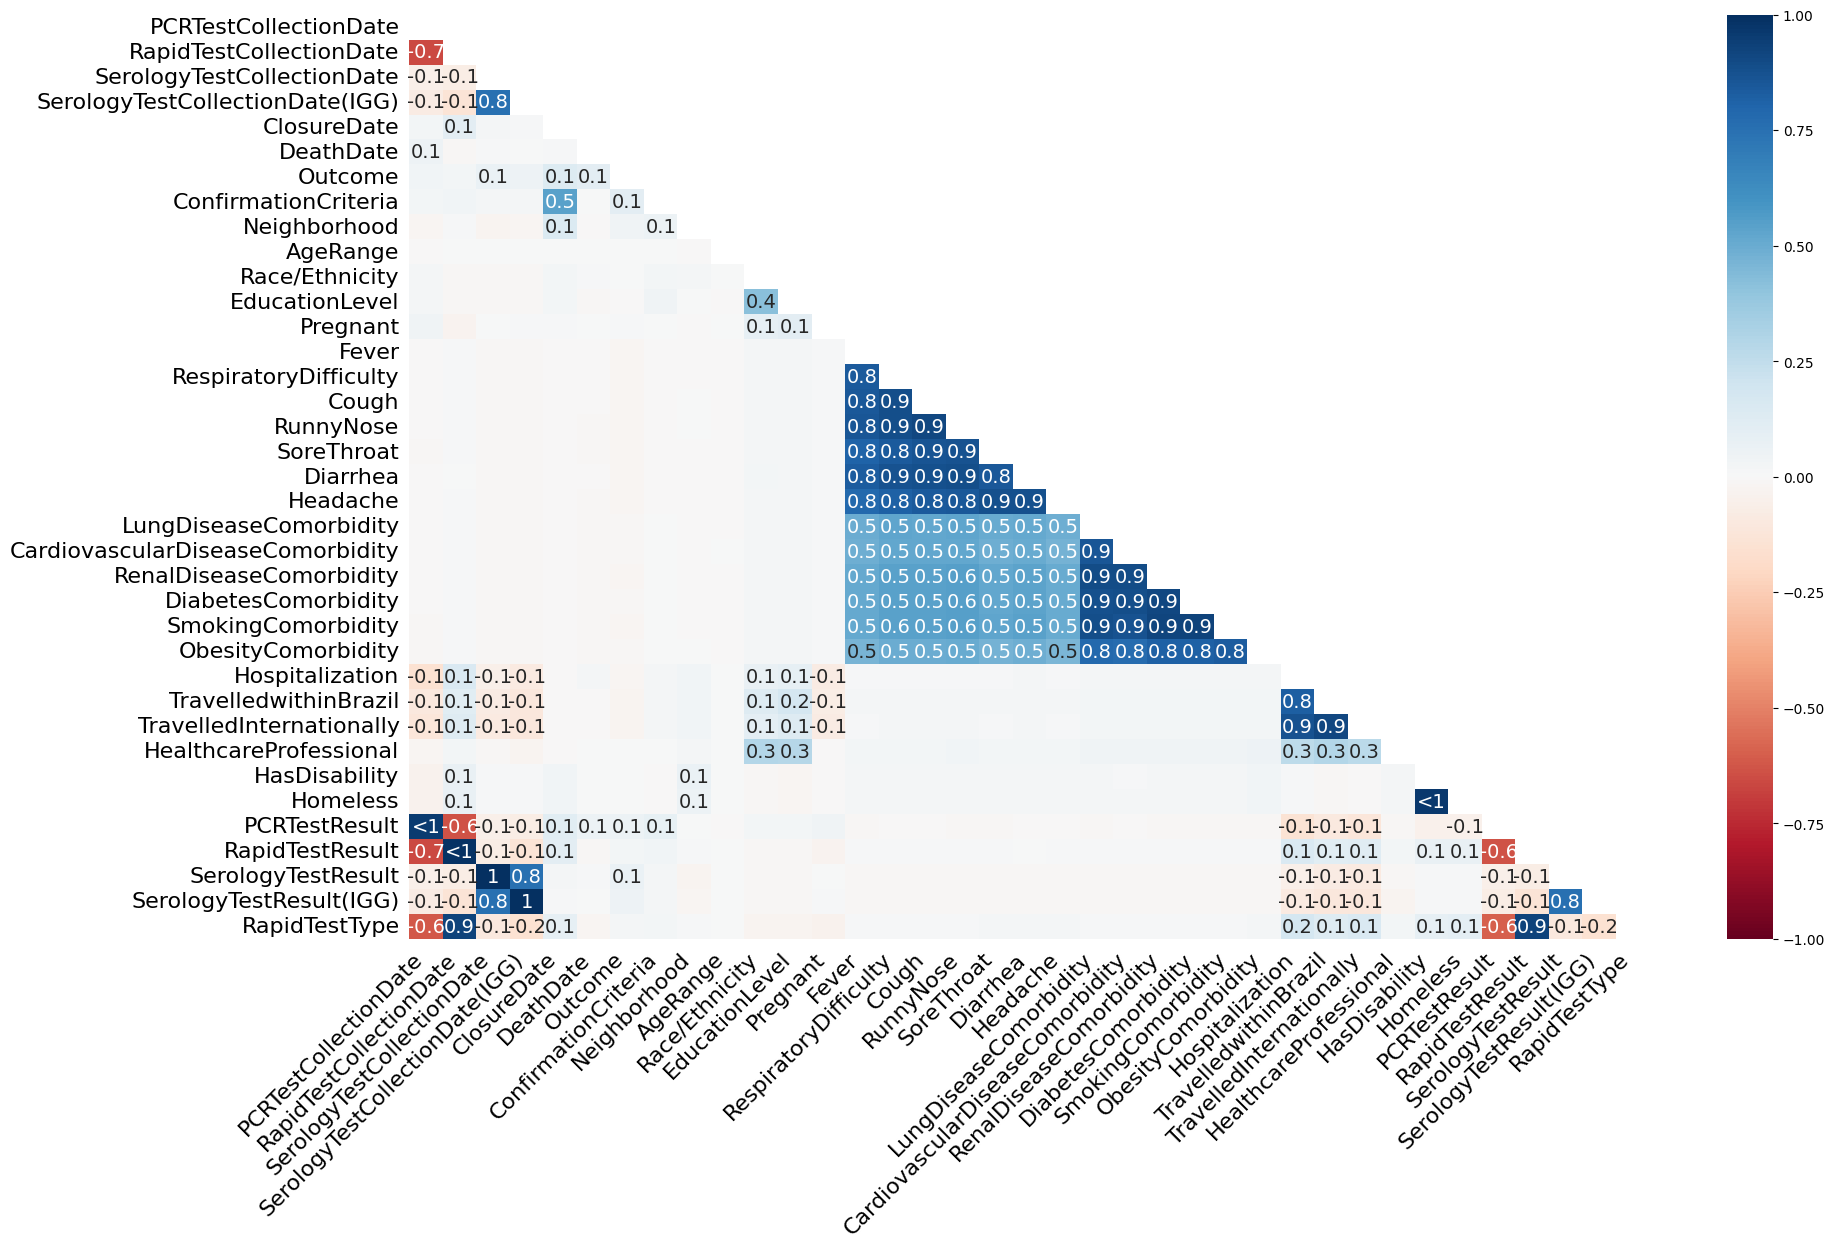

In [ ]:
x = msno.heatmap(df)
x

In [ ]:
df1 = df.drop(columns=['RegistrationDate','PCRTestCollectionDate', 'RapidTestCollectionDate','SerologyTestCollectionDate',
                       'SerologyTestCollectionDate(IGG)','ClosureDate','DeathDate','Outcome','ConfirmationCriteria',
                       'Race/Ethnicity','PCRTestResult','RapidTestResult','SerologyTestResult',
                       'SerologyTestResult(IGG)','RapidTestType','TravelledwithinBrazil','TravelledInternationally',
                       'AgeAtNotificationDate'])
df1

,NotificationDate,DiagnosisDate,Classification,NotificationStatus,City,Neighborhood,AgeRange,Gender,EducationLevel,Pregnant,...,LungDiseaseComorbidity,CardiovascularDiseaseComorbidity,RenalDiseaseComorbidity,DiabetesComorbidity,SmokingComorbidity,ObesityComorbidity,Hospitalization,HealthcareProfessional,HasDisability,Homeless
4867881,2020-01-23,2020-01-20,Descartados,Encerrado,AGUIA BRANCA,CENTRO,40 a 49 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
4867880,2020-02-25,2020-02-13,Descartados,Encerrado,SERRA,BAIRRO DE FÁTIMA,50 a 59 anos,M,NaN,Não se aplica,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
4867878,2020-02-27,2020-02-15,Descartados,Encerrado,VILA VELHA,JOCKEY DE ITAPARICA,0 a 4 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,NaN,Não,NaN,NaN
4867877,2020-02-27,2020-02-16,Descartados,Encerrado,VILA VELHA,SANTA MÔNICA,70 a 79 anos,M,NaN,Não se aplica,...,Não,Sim,Não,Sim,Não,Não,Não,Não,NaN,NaN
4867876,2020-02-27,2020-02-09,Descartados,Encerrado,VILA VELHA,ITAPUÃ,40 a 49 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-07-07,2023-06-27,Descartados,Em Aberto,NOVA VENECIA,ALTOÉ,05 a 9 anos,F,Ensino fundamental completo (antigo ginásio ou...,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
263,2023-07-07,2023-07-02,Suspeito,Em Aberto,VITORIA,GURIGICA,10 a 19 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
264,2023-07-07,2023-07-06,Suspeito,Em Aberto,VITORIA,CENTRO,70 a 79 anos,M,Não se aplica,NaN,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
242,2023-07-07,2023-07-05,Confirmados,Em Aberto,SERRA,NOVA CARAPINA I,30 a 39 anos,M,NaN,Não se aplica,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [ ]:
df1

,NotificationDate,DiagnosisDate,Classification,NotificationStatus,City,Neighborhood,AgeRange,Gender,EducationLevel,Pregnant,...,LungDiseaseComorbidity,CardiovascularDiseaseComorbidity,RenalDiseaseComorbidity,DiabetesComorbidity,SmokingComorbidity,ObesityComorbidity,Hospitalization,HealthcareProfessional,HasDisability,Homeless
4867881,2020-01-23,2020-01-20,Descartados,Encerrado,AGUIA BRANCA,CENTRO,40 a 49 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,NaN,Não,Não,Não
4867880,2020-02-25,2020-02-13,Descartados,Encerrado,SERRA,BAIRRO DE FÁTIMA,50 a 59 anos,M,NaN,Não se aplica,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
4867878,2020-02-27,2020-02-15,Descartados,Encerrado,VILA VELHA,JOCKEY DE ITAPARICA,0 a 4 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,NaN,Não,NaN,NaN
4867877,2020-02-27,2020-02-16,Descartados,Encerrado,VILA VELHA,SANTA MÔNICA,70 a 79 anos,M,NaN,Não se aplica,...,Não,Sim,Não,Sim,Não,Não,Não,Não,NaN,NaN
4867876,2020-02-27,2020-02-09,Descartados,Encerrado,VILA VELHA,ITAPUÃ,40 a 49 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-07-07,2023-06-27,Descartados,Em Aberto,NOVA VENECIA,ALTOÉ,05 a 9 anos,F,Ensino fundamental completo (antigo ginásio ou...,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
263,2023-07-07,2023-07-02,Suspeito,Em Aberto,VITORIA,GURIGICA,10 a 19 anos,F,NaN,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
264,2023-07-07,2023-07-06,Suspeito,Em Aberto,VITORIA,CENTRO,70 a 79 anos,M,Não se aplica,NaN,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
242,2023-07-07,2023-07-05,Confirmados,Em Aberto,SERRA,NOVA CARAPINA I,30 a 39 anos,M,NaN,Não se aplica,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [ ]:
df1.fillna('missing', inplace=True)

<Axes: >

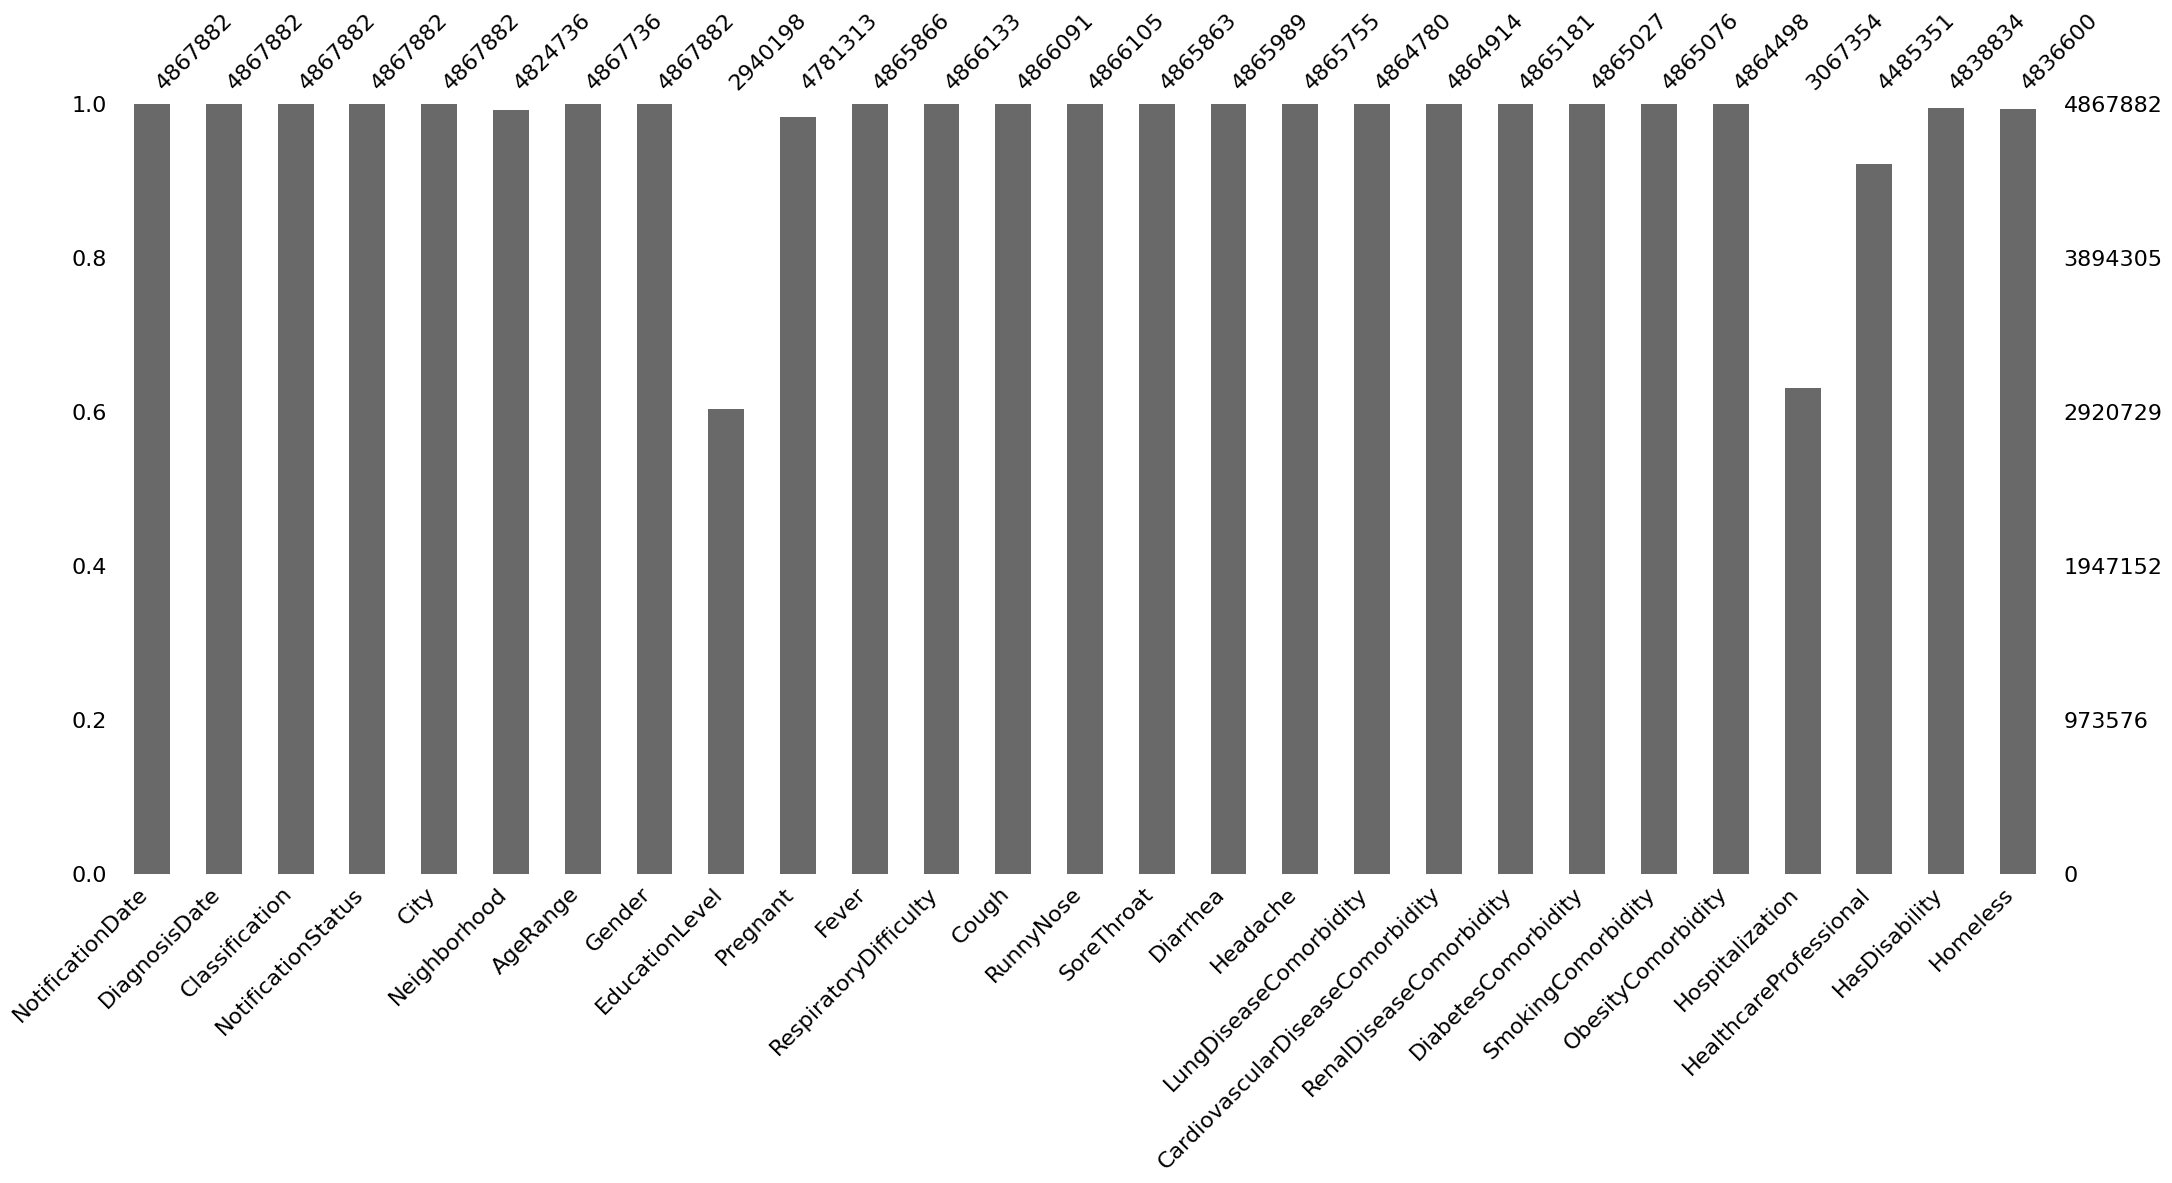

In [ ]:
x = msno.bar(df1)
x

In [1]:
# fig_copy = x.get_figure()
# fig_copy.savefig('plot.jpg', bbox_inches = 'tight')

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a LabelEncoder object
le = LabelEncoder()
# le.set_params(encoded_missing_value=-1)

# Apply label encoding to each column in the DataFrame
for col in df1.drop(columns=['NotificationDate',	'DiagnosisDate',	'Classification']).columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])
        index = np.where(le.classes_ == 'missing')
        if len(index[0]) != 0:
          df1[col] = df1[col].replace(index[0][0], np.nan)


In [ ]:
le.classes_

array(['Não', 'Sim', 'missing'], dtype=object)

In [ ]:
df1.columns
df_symptoms = df1.filter(['NotificationDate','Fever','RespiratoryDifficulty', 'Cough', 'RunnyNose',
                          'SoreThroat', 'Diarrhea','Headache', 'LungDiseaseComorbidity', 'CardiovascularDiseaseComorbidity',
                          'RenalDiseaseComorbidity', 'DiabetesComorbidity', 'SmokingComorbidity',
                          'ObesityComorbidity', 'Hospitalization','AgeRange','Gender','HasDisability'],axis=1)
df_symptoms

,NotificationDate,Fever,RespiratoryDifficulty,Cough,RunnyNose,SoreThroat,Diarrhea,Headache,LungDiseaseComorbidity,CardiovascularDiseaseComorbidity,RenalDiseaseComorbidity,DiabetesComorbidity,SmokingComorbidity,ObesityComorbidity,Hospitalization,AgeRange,Gender,HasDisability
4867881,2020-01-23,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,0,0.0
4867880,2020-02-25,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2,0.0
4867878,2020-02-27,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,NaN
4867877,2020-02-27,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0,2,NaN
4867876,2020-02-27,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-07-07,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
263,2023-07-07,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0
264,2023-07-07,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2,0.0
242,2023-07-07,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2,0.0


## impute the data each 3 months as a chunk


In [ ]:
# start_date = '2020-01-23'
# end_date = '2020-03-23'
# sample = df_symptoms.loc[(df['NotificationDate'] >= start_date) & (df['NotificationDate'] <= end_date)]
# # Print the result
# sample
# df_symptoms.iloc[:, 1:]


# df_symptoms.to_csv('df_symptoms_without imputation.csv')
df_symptoms = pd.read_csv('df_symptoms_without imputation.csv')
df_symptoms['NotificationDate'] = pd.to_datetime(df_symptoms['NotificationDate'])
# df_symptoms

In [ ]:
results = df_symptoms.resample('3M', on='NotificationDate', closed='left')
df_symptoms_chunks_data=[]
# Print the result
for chunk in results :
  # Extract the chunk data and process it
    df_symptoms_chunks_data.append (chunk[1])
df_symptoms_chunks_data[3]

,Unnamed: 0,NotificationDate,Fever,RespiratoryDifficulty,Cough,RunnyNose,SoreThroat,Diarrhea,Headache,LungDiseaseComorbidity,CardiovascularDiseaseComorbidity,RenalDiseaseComorbidity,DiabetesComorbidity,SmokingComorbidity,ObesityComorbidity,Hospitalization,AgeRange,Gender,HasDisability
1218,4866597,2020-03-31,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,0.0,2,0.0
1219,4866596,2020-03-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2,0.0
1220,4866595,2020-03-31,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0,0.0
1221,4866594,2020-03-31,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2,NaN
1222,4866591,2020-03-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15916,4852681,2020-04-29,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0,NaN
15917,4852682,2020-04-29,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,0.0
15918,4852683,2020-04-29,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2,0.0
15919,4852684,2020-04-29,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,0,0.0


In [ ]:
for d in df_symptoms_chunks_data:
  print(d.isna().sum())
# df_symptoms_chunks_data[0]

In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Convert non-numeric values to numeric values using one-hot encoding
categorical_cols = ['Fever',
'RespiratoryDifficulty', 'Cough', 'RunnyNose', 'SoreThroat', 'Diarrhea',
'Headache', 'LungDiseaseComorbidity', 'CardiovascularDiseaseComorbidity',
'RenalDiseaseComorbidity', 'DiabetesComorbidity', 'SmokingComorbidity',
'ObesityComorbidity', 'Hospitalization',]
for i in range(len(df_symptoms_chunks_data)):
  # Convert yes/no values to binary values (1 for yes, 0 for no)
  # df_symptoms_chunks_data[i] = df_symptoms_chunks_data[i].replace({'Sim': 1, 'Não': 0})

  df_symptoms_chunks_data[i] = df_symptoms_chunks_data[i].filter(categorical_cols, axis=1)
  # print(df_mice)
  # Convert non-numeric values to numeric values
  # df_mice = df_mice.apply(pd.to_numeric, errors='coerce')
  # print(df_mice)
  # Define MICE Imputer and fill missing values
  mice_imputer = IterativeImputer(estimator=LogisticRegression(solver='lbfgs'), imputation_order='ascending')
  df_mice_imputed = mice_imputer.fit_transform(df_symptoms_chunks_data[i])
  df_mice_imputed = pd.DataFrame(df_mice_imputed, columns=df_symptoms_chunks_data[i].columns, index=df_symptoms_chunks_data[i].index)
  df_symptoms_chunks_data[i] = df_mice_imputed
  df_symptoms_chunks_data[i] = df_symptoms_chunks_data[i].assign(Period=i)



  # Convert binary values back to yes/no values
  # df_mice_imputed = df_mice_imputed.replace({1: 'yes', 0: 'no'})

  # Print the resulting DataFrame with imputed values




In [ ]:
for d in df_symptoms_chunks_data:
  print(d.isna().sum())

Fever                               0
RespiratoryDifficulty               0
Cough                               0
RunnyNose                           0
SoreThroat                          0
Diarrhea                            0
Headache                            0
LungDiseaseComorbidity              0
CardiovascularDiseaseComorbidity    0
RenalDiseaseComorbidity             0
DiabetesComorbidity                 0
SmokingComorbidity                  0
ObesityComorbidity                  0
Hospitalization                     0
Period                              0
dtype: int64
Fever                               0
RespiratoryDifficulty               0
Cough                               0
RunnyNose                           0
SoreThroat                          0
Diarrhea                            0
Headache                            0
LungDiseaseComorbidity              0
CardiovascularDiseaseComorbidity    0
RenalDiseaseComorbidity             0
DiabetesComorbidity                 0

## impute the data each month with the previous two months

In [ ]:
df_symptoms = pd.read_csv('df_symptoms_without imputation.csv')
df_symptoms['NotificationDate'] = pd.to_datetime(df_symptoms['NotificationDate'])

In [ ]:
results = df_symptoms.resample('1M', on='NotificationDate', closed='left')
df_symptoms_chunks_data=[]
# Print the result
for chunk in results :
  # Extract the chunk data and process it
    df_symptoms_chunks_data.append (chunk[1])
df_symptoms_chunks_data[3]

,NotificationDate,Fever,RespiratoryDifficulty,Cough,RunnyNose,SoreThroat,Diarrhea,Headache,LungDiseaseComorbidity,CardiovascularDiseaseComorbidity,RenalDiseaseComorbidity,DiabetesComorbidity,SmokingComorbidity,ObesityComorbidity,Hospitalization,AgeRange,Gender,HasDisability
4866597,2020-03-31,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,0.0,2,0.0
4866596,2020-03-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2,0.0
4866595,2020-03-31,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0,0.0
4866594,2020-03-31,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2,NaN
4866591,2020-03-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852681,2020-04-29,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0,NaN
4852682,2020-04-29,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,0.0
4852683,2020-04-29,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2,0.0
4852684,2020-04-29,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,0,0.0


In [ ]:
# i=5
# pd.concat([df_symptoms_chunks_data[i-2],df_symptoms_chunks_data[i-1],df_symptoms_chunks_data[i]])
print(len(df_symptoms_chunks_data))

43


In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
concat_df_symptoms_chunks_data = []
# Convert non-numeric values to numeric values using one-hot encoding
categorical_cols = ['Fever',
'RespiratoryDifficulty', 'Cough', 'RunnyNose', 'SoreThroat', 'Diarrhea',
'Headache', 'LungDiseaseComorbidity', 'CardiovascularDiseaseComorbidity',
'RenalDiseaseComorbidity', 'DiabetesComorbidity', 'SmokingComorbidity',
'ObesityComorbidity', 'Hospitalization',]
for i in range(2,len(df_symptoms_chunks_data)):
  # Convert yes/no values to binary values (1 for yes, 0 for no)
  # df_symptoms_chunks_data[i] = df_symptoms_chunks_data[i].replace({'Sim': 1, 'Não': 0})
  concat_df_symptoms_chunks_data.append(pd.concat([df_symptoms_chunks_data[i-2],df_symptoms_chunks_data[i-1],df_symptoms_chunks_data[i]]).filter(categorical_cols, axis=1))
  print(df_symptoms_chunks_data[i].isna().sum())
  # df_symptoms_chunks_data[i] = df_symptoms_chunks_data[i].filter(categorical_cols, axis=1)
  # print(df_mice)
  # Convert non-numeric values to numeric values
  # df_mice = df_mice.apply(pd.to_numeric, errors='coerce')
  # print(df_mice)
  # Define MICE Imputer and fill missing values
  mice_imputer = IterativeImputer(estimator=LogisticRegression(solver='lbfgs'), imputation_order='ascending')
  df_mice_imputed = mice_imputer.fit_transform(concat_df_symptoms_chunks_data[i-2])
  df_mice_imputed = pd.DataFrame(df_mice_imputed, columns=concat_df_symptoms_chunks_data[i-2].columns, index=concat_df_symptoms_chunks_data[i-2].index)
  concat_df_symptoms_chunks_data[i-2] = df_mice_imputed
  concat_df_symptoms_chunks_data[i-2] = concat_df_symptoms_chunks_data[i-2].assign(Period=i)

  df_symptoms_chunks_data[i-2] = concat_df_symptoms_chunks_data[i-2].iloc[:len(df_symptoms_chunks_data[i-2])]
  df_symptoms_chunks_data[i-1] = concat_df_symptoms_chunks_data[i-2].iloc[len(df_symptoms_chunks_data[i-2]):len(df_symptoms_chunks_data[i-2])+len(df_symptoms_chunks_data[i-1])]
  df_symptoms_chunks_data[i] = concat_df_symptoms_chunks_data[i-2].iloc[len(df_symptoms_chunks_data[i-2])+len(df_symptoms_chunks_data[i-1]):]
  print('after ',df_symptoms_chunks_data[i].isna().sum())



  # Convert binary values back to yes/no values
  # df_mice_imputed = df_mice_imputed.replace({1: 'yes', 0: 'no'})

  # Print the resulting DataFrame with imputed values




NotificationDate                      0
Fever                                 1
RespiratoryDifficulty                 0
Cough                                 0
RunnyNose                             0
SoreThroat                            0
Diarrhea                              0
Headache                              0
LungDiseaseComorbidity                4
CardiovascularDiseaseComorbidity      3
RenalDiseaseComorbidity               4
DiabetesComorbidity                   4
SmokingComorbidity                    3
ObesityComorbidity                    3
Hospitalization                     802
AgeRange                              2
Gender                                0
HasDisability                       638
dtype: int64
after  Fever                               0
RespiratoryDifficulty               0
Cough                               0
RunnyNose                           0
SoreThroat                          0
Diarrhea                            0
Headache                        

In [ ]:
toto = []
for d in df_symptoms_chunks_data:
  print(d.isna().sum())
for i in range(3,len(df_symptoms_chunks_data),3):
  print(i)
  if i+3 > len(df_symptoms_chunks_data):
    toto.append(pd.concat(df_symptoms_chunks_data[i-3:]))
  else:
    toto.append(pd.concat(df_symptoms_chunks_data[i-3:i]))
print(len(toto))

Fever                               0
RespiratoryDifficulty               0
Cough                               0
RunnyNose                           0
SoreThroat                          0
Diarrhea                            0
Headache                            0
LungDiseaseComorbidity              0
CardiovascularDiseaseComorbidity    0
RenalDiseaseComorbidity             0
DiabetesComorbidity                 0
SmokingComorbidity                  0
ObesityComorbidity                  0
Hospitalization                     0
Period                              0
dtype: int64
Fever                               0
RespiratoryDifficulty               0
Cough                               0
RunnyNose                           0
SoreThroat                          0
Diarrhea                            0
Headache                            0
LungDiseaseComorbidity              0
CardiovascularDiseaseComorbidity    0
RenalDiseaseComorbidity             0
DiabetesComorbidity                 0

In [ ]:
# import pickle
# import pandas as pd

# # Save the list of dataframes to disk
# with open('df_symptoms_chunks_data.pkl', 'wb') as f:
#     pickle.dump(df_symptoms_chunks_data, f)

In [ ]:
# !cp -r /content/df_symptoms_chunks_data.pkl /content/drive/MyDrive

In [ ]:
import pickle

# Load the list of dataframes from disk
with open('/content/drive/MyDrive/Covid files/df_symptoms_chunks_data.pkl', 'rb') as f:
    df_list = pickle.load(f)

# Print the first dataframe in the list
df_list[1]

,Fever,RespiratoryDifficulty,Cough,RunnyNose,SoreThroat,Diarrhea,Headache,LungDiseaseComorbidity,CardiovascularDiseaseComorbidity,RenalDiseaseComorbidity,DiabetesComorbidity,SmokingComorbidity,ObesityComorbidity,Hospitalization,Period
4866597,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4866596,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4866595,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4866594,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4866591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4726636,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4726628,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4726637,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# # df_list = df_symptoms_chunks_data
# c = 0
# y_list = []
# for i in range(len(df_list)):
#   y = df1['Classification'][c:c+len(df_list[i])]
#   c+=len(df_list[i])
#   y_list.append(y)



In [ ]:
# df1['Classification'].to_csv('y_df.csv', index=False)
# !cp -r /content/y_df.csv /content/drive/MyDrive
y_df = pd.read_csv('/content/drive/MyDrive/Covid files/y_df.csv')
y_df

,Classification
0,Descartados
1,Descartados
2,Descartados
3,Descartados
4,Descartados
...,...
4867877,Descartados
4867878,Suspeito
4867879,Suspeito
4867880,Confirmados


In [ ]:
# # Create an array of dataframes
# ddf1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
# ddf2 = pd.DataFrame({'A': [3, 4], 'B': [5, 6]})
# ddf3 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
# df_array = [ddf1, ddf2, ddf3]
# # concatenated = pd.concat(df_array)
# # concatenated
# # Concatenate the dataframes in the array
concatenated_symptoms_df = pd.concat(df_list)
# concatenated_symptoms_df.insert(loc=0, column='NotificationDate', value  =df1['NotificationDate'].values)
# concatenated_symptoms_df.to_csv('imputed_symptoms_df.csv', index=False)

In [ ]:
# concatenated_symptoms_df

In [ ]:
# df2f = pd.read_csv('/content/drive/MyDrive/imputed_symptoms_df.csv')

# df2f

In [ ]:
# !cp -r /content/df_other.csv /content/drive/MyDrive
# !cp -r /content/s3.sa-east-1.amazonaws.com /content/drive/MyDrive

In [ ]:
df_other = df1.filter(['NotificationDate','City', 'Neighborhood','AgeRange','Gender','Pregnant',
                       'HealthcareProfessional', 'HasDisability', 'Homeless'],axis=1)
df_other.to_csv('df_other.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import copy

df_other = pd.read_csv('/content/drive/MyDrive/Covid files/df_other.csv')
df_other

,NotificationDate,City,Neighborhood,AgeRange,Gender,Pregnant,HealthcareProfessional,HasDisability,Homeless
0,2020-01-23,55,924.0,5.0,0,4.0,0.0,0.0,0.0
1,2020-02-25,1771,450.0,6.0,2,5.0,0.0,0.0,0.0
2,2020-02-27,1951,2337.0,0.0,0,4.0,0.0,NaN,NaN
3,2020-02-27,1951,3403.0,8.0,2,5.0,0.0,NaN,NaN
4,2020-02-27,1951,2240.0,5.0,0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4867877,2023-07-07,1240,252.0,1.0,0,4.0,0.0,0.0,0.0
4867878,2023-07-07,1960,2125.0,2.0,0,4.0,0.0,0.0,0.0
4867879,2023-07-07,1960,924.0,8.0,2,NaN,0.0,0.0,0.0
4867880,2023-07-07,1771,2737.0,4.0,2,5.0,0.0,0.0,0.0


In [ ]:
df_other['NotificationDate'] = pd.to_datetime(df_other['NotificationDate'])

df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867882 entries, 0 to 4867881
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   NotificationDate        datetime64[ns]
 1   City                    int64         
 2   Neighborhood            float64       
 3   AgeRange                float64       
 4   Gender                  int64         
 5   Pregnant                float64       
 6   HealthcareProfessional  float64       
 7   HasDisability           float64       
 8   Homeless                float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 334.3 MB


In [ ]:
results = df_other.resample('4M', on='NotificationDate', closed='left')
df_other_chunks_data=[]
# Print the result
for chunk in results :
  # Extract the chunk data and process it
    df_other_chunks_data.append (chunk[1])
df_other_chunks_data[0]

,NotificationDate,City,Neighborhood,AgeRange,Gender,Pregnant,HealthcareProfessional,HasDisability,Homeless
0,2020-01-23,55,924.0,5.0,0,4.0,0.0,0.0,0.0
1,2020-02-25,1771,450.0,6.0,2,5.0,0.0,0.0,0.0
2,2020-02-27,1951,2337.0,0.0,0,4.0,0.0,NaN,NaN
3,2020-02-27,1951,3403.0,8.0,2,5.0,0.0,NaN,NaN
4,2020-02-27,1951,2240.0,5.0,0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15916,2020-04-29,1415,2707.0,4.0,0,4.0,1.0,NaN,NaN
15917,2020-04-29,1771,3684.0,4.0,0,4.0,1.0,0.0,0.0
15918,2020-04-29,1951,3823.0,4.0,2,5.0,0.0,0.0,0.0
15919,2020-04-29,1771,3002.0,4.0,0,4.0,1.0,0.0,0.0


In [ ]:
for d in df_other_chunks_data:
  print(d.isna().sum())
df_other_chunks_data[0]

NotificationDate             0
City                         0
Neighborhood               699
AgeRange                     2
Gender                       0
Pregnant                   140
HealthcareProfessional    4669
HasDisability             8146
Homeless                  8164
dtype: int64
NotificationDate              0
City                          0
Neighborhood               6082
AgeRange                      6
Gender                        0
Pregnant                   1847
HealthcareProfessional    23373
HasDisability             20902
Homeless                  23118
dtype: int64
NotificationDate              0
City                          0
Neighborhood               2802
AgeRange                     21
Gender                        0
Pregnant                   1082
HealthcareProfessional    40900
HasDisability                 0
Homeless                      0
dtype: int64
NotificationDate              0
City                          0
Neighborhood               3516
AgeRange  

,NotificationDate,City,Neighborhood,AgeRange,Gender,Pregnant,HealthcareProfessional,HasDisability,Homeless
0,2020-01-23,55,924.0,5.0,0,4.0,0.0,0.0,0.0
1,2020-02-25,1771,450.0,6.0,2,5.0,0.0,0.0,0.0
2,2020-02-27,1951,2337.0,0.0,0,4.0,0.0,NaN,NaN
3,2020-02-27,1951,3403.0,8.0,2,5.0,0.0,NaN,NaN
4,2020-02-27,1951,2240.0,5.0,0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15916,2020-04-29,1415,2707.0,4.0,0,4.0,1.0,NaN,NaN
15917,2020-04-29,1771,3684.0,4.0,0,4.0,1.0,0.0,0.0
15918,2020-04-29,1951,3823.0,4.0,2,5.0,0.0,0.0,0.0
15919,2020-04-29,1771,3002.0,4.0,0,4.0,1.0,0.0,0.0


In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Convert non-numeric values to numeric values using one-hot encoding
categorical_cols_other = ['City', 'Neighborhood','AgeRange','Gender','Pregnant',
                       'EducationLevel','HealthcareProfessional', 'HasDisability', 'Homeless']
for i in range(len(df_other_chunks_data)):
  # Convert yes/no values to binary values (1 for yes, 0 for no)
  # df_symptoms_chunks_data[i] = df_symptoms_chunks_data[i].replace({'Sim': 1, 'Não': 0})

  df_other_chunks_data[i] = df_other_chunks_data[i].filter(categorical_cols_other, axis=1)
  # print(df_mice)
  # Convert non-numeric values to numeric values
  # df_mice = df_mice.apply(pd.to_numeric, errors='coerce')
  # print(df_mice)
  # Define MICE Imputer and fill missing values
  mice_imputer = IterativeImputer(estimator=LogisticRegression(solver='lbfgs'), imputation_order='ascending')
  df_mice_imputed = mice_imputer.fit_transform(df_other_chunks_data[i])
  df_mice_imputed = pd.DataFrame(df_mice_imputed, columns=df_other_chunks_data[i].columns, index=df_other_chunks_data[i].index)
  df_other_chunks_data[i] = df_mice_imputed
  print('*********DONE************')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# df_other.isna().sum()

NotificationDate                0
City                            0
Neighborhood                43146
AgeRange                      146
Gender                          0
Pregnant                    86569
EducationLevel            1927684
HealthcareProfessional     382531
HasDisability               29048
Homeless                    31282
dtype: int64